# Dask Expressions

exploring by Sean

## Parquet reading timing

Using 1000 partitions of ztf_source

### `dd.read_parquet`
```
dd.read_parquet(paths)
```

### `dd.from_map`
```
dd.from_map(pd.read_parquet, paths)
```

### `dd.from_delayed`
```
readparq = dask.delayed(pd.read_parquet)
dd.from_delayed(np.vectorize(readparq)(paths))
```

In [10]:
import lsdb
import hipscat as hc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd

In [15]:
ztf_source = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source")
paths = hc.io.paths.pixel_catalog_files(ztf_source.hc_structure.catalog_base_dir, ztf_source.get_healpix_pixels()[:1000])

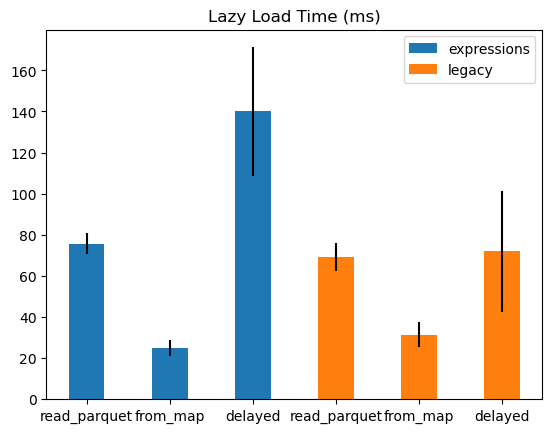

In [3]:
x = ["read_parquet", "from_map", "delayed"]
X_axis = np.arange(len(x)) * 7
y = [75.7, 25, 140]
z = [69.1, 31.4, 72]
err = [5.26, 3.94, 31.3]
zerr = [6.76, 6.1, 29.4]
OFFSET = 21
plt.bar(X_axis, y, yerr=err, width=3, label="expressions")
plt.bar(X_axis + OFFSET, z, yerr=zerr, width=3, label="legacy")
plt.title("Lazy Load Time (ms)")
plt.xticks(np.concatenate([X_axis, X_axis + OFFSET]), x * 2)
plt.legend()
plt.show()

## Reading with column filtering

Timing the speedup by computing a single columnn of the df

```
ddf["index"].compute()
```

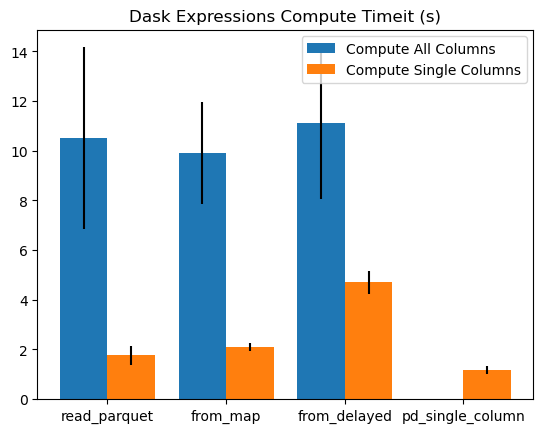

In [4]:
x = ["read_parquet", "from_map", "from_delayed", "pd_single_column"]
X_axis = np.arange(len(x)) * 2
y = [10.5, 9.9, 11.1, 0]
z = [1.77, 2.11, 4.7, 1.17]
yerr = [3.67, 2.05, 3.06, 0]
zerr = [0.384, 0.159, 0.449, 0.164]
OFFSET = 0.4
plt.bar(X_axis - OFFSET, y, yerr=yerr, label="Compute All Columns")
plt.bar(X_axis + OFFSET, z, yerr=zerr, label="Compute Single Columns")
plt.xticks(X_axis, x)
plt.title("Dask Expressions Compute Timeit (s)")
plt.legend()
plt.show()

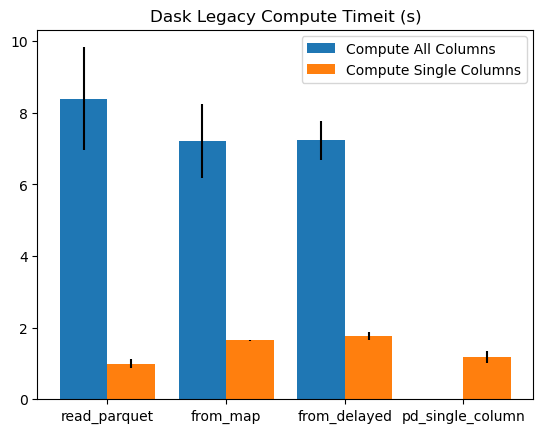

In [5]:
x = ["read_parquet", "from_map", "from_delayed", "pd_single_column"]
X_axis = np.arange(len(x)) * 2
y = [8.39, 7.21, 7.23, 0]
z = [0.987, 1.64, 1.77, 1.17]
yerr = [1.44, 1.03, 0.543, 0]
zerr = [0.125, 0.018, 0.105, 0.164]
OFFSET = 0.4
plt.bar(X_axis - OFFSET, y, yerr=yerr, label="Compute All Columns")
plt.bar(X_axis + OFFSET, z, yerr=zerr, label="Compute Single Columns")
plt.xticks(X_axis, x)
plt.title("Dask Legacy Compute Timeit (s)")
plt.legend()
plt.show()

## Dashboard Compute Time

![thing](images/Screenshot%202024-05-16%20at%202.41.44%E2%80%AFPM.png)

![thing1](images/Screenshot%202024-05-16%20at%202.44.07%E2%80%AFPM.png)

In [21]:
dd.read_parquet(paths[:10])["index"].pprint()

Projection: columns='index'
  ReadParquetFSSpec: path=['/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=137.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=138.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=540.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=688.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1029.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1030.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1033.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1034.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1285.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1286.parquet'] kwargs={'dtype_backend': None}


In [23]:
dd.read_parquet(paths[:10])["index"].simplify().pprint()

Projection: columns='index'
  ReadParquetFSSpec: path=['/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=137.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=138.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=540.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=688.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1029.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1030.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1033.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1034.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1285.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1286.parquet'] columns=['index'] kwargs={'dtype_backend': None}


### With legacy dask

![thing2](images/Screenshot%202024-05-16%20at%202.45.19%E2%80%AFPM.png)

![thing4](images/Screenshot%202024-05-16%20at%202.57.20%E2%80%AFPM.png)

![thing3](images/Screenshot%202024-05-16%20at%202.46.53%E2%80%AFPM.png)

### query

![thing5](images/Screenshot%202024-05-16%20at%203.01.00%E2%80%AFPM.png)

![thing6](images/Screenshot%202024-05-16%20at%203.01.34%E2%80%AFPM.png)

![8](images/Screenshot%202024-05-16%20at%203.02.46%E2%80%AFPM.png)

In [24]:
dd.read_parquet(paths[:10]).query("ra>0")["index"].simplify().pprint()

Projection: columns='index'
  Query: _expr='ra>0'
    ReadParquetFSSpec: path=['/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=137.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=138.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=540.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=688.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1029.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1030.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1033.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1034.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1285.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1286.parquet'] kwargs={'dtype_backend': 

## Using column selector

![510](images/Screenshot%202024-05-16%20at%203.05.06%E2%80%AFPM.png)

In [25]:
df = dd.read_parquet(paths[:10])
df[df["ra"] > 0]["index"].simplify().pprint()

Filter:
  Projection: columns='index'
    ReadParquetFSSpec: path=['/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=137.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=2/Dir=0/Npix=138.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=540.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=3/Dir=0/Npix=688.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1029.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1030.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1033.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1034.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1285.parquet', '/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source/Norder=4/Dir=0/Npix=1286.parquet'] columns=['index', 'ra'] kwargs={'dtyp

## Map Partitions
![12313](images/Screenshot%202024-05-16%20at%203.15.36%E2%80%AFPM.png)

## add columns

![12313adsas](images/Screenshot%202024-05-16%20at%203.18.43%E2%80%AFPM.png)

![aiudhsao](images/Screenshot%202024-05-16%20at%203.19.32%E2%80%AFPM.png)


# From Map

![adjaiodjoia](images/Screenshot%202024-05-16%20at%203.20.37%E2%80%AFPM.png)

![ajdiosajdopsa](images/Screenshot%202024-05-16%20at%203.21.06%E2%80%AFPM.png)